In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from utils import *

### Preprocessing

In [41]:
df = pd.read_csv('dataset/heroNetwork.csv')
#nodes = pd.read_csv('dataset/nodes.csv')
#edges = pd.read_csv('dataset/edges.csv')
print(len(df))

df = df.loc[df['hero1'] != df['hero2']]
print(len(df))

574467
572235


In [20]:
#Remove duplicated relations between heroes

df['combined'] = df.apply(lambda row: frozenset([row['hero1'], row['hero2']]), axis=1)

# Trovare e rimuovere i duplicati
df = df[~df.duplicated(subset='combined')]
df = df.drop('combined', axis=1)

print(len(df))

167207


### Network

In [21]:
heroes = nx.from_pandas_edgelist(df, source = "hero1", target = "hero2")

degrees = heroes.degree()
degrees = list(degrees)
degrees.sort(key = lambda x: x[1], reverse = True)

In [15]:
#take the first 100 elements, but only the first element of each tuple
best_heroes = [x[0] for x in degrees[:100]]
heroes = heroes.subgraph(best_heroes)

In [16]:
print("NODES: ", len(heroes.nodes))
print("EDGES: ", len(heroes.edges))
print("DENSITY: ", nx.density(heroes))
print("RADIUS: ", nx.radius(heroes))
print("DIAMETER: ", nx.diameter(heroes))
print("PERIPHERY: ", nx.periphery(heroes))
print("CLUSTERING: ", nx.average_clustering(heroes))
print("IS CONNECTED: ", nx.is_connected(heroes))

NODES:  100
EDGES:  4325
DENSITY:  0.8737373737373737
RADIUS:  1
DIAMETER:  2
PERIPHERY:  ['UATU', 'MOON KNIGHT/MARC SPE', 'MARVEL GIRL/JEAN GRE', 'SERSI/SYLVIA', 'COOPER, DR. VALERIE', 'SPEEDBALL/ROBBIE BAL', 'BLACK WIDOW/NATASHA ', 'CAPTAIN MARVEL II/MO', 'PARKER, MAY', 'IRON FIST/DANIEL RAN', 'MR. FANTASTIC/REED R', 'CANNONBALL II/SAM GU', 'ICEMAN/ROBERT BOBBY ', 'THOR/DR. DONALD BLAK', 'SILVER SURFER/NORRIN', 'IRON MAN/TONY STARK ', 'MOONSTONE II/KARLA S', 'ROGUE /', 'SUNSPOT/ROBERTO DACO', 'NELSON, FRANKLIN FOG', 'CRYSTAL [INHUMAN]', 'GAMBIT/REMY LEBEAU ', 'WONDER MAN/SIMON WIL', 'DR. DOOM/VICTOR VON ', 'HAVOK/ALEX SUMMERS ', 'TIGRA/GREER NELSON', 'BEAST/HENRY &HANK& P', 'DAREDEVIL/MATT MURDO', 'WONG', 'STARFOX/EROS', 'CAGE, LUKE/CARL LUCA', 'BLACK KNIGHT V/DANE ', 'WATSON-PARKER, MARY ', 'SCARLET WITCH/WANDA ', 'ROBERTSON, JOE', 'VISION ', 'JAMESON, J. JONAH', 'RICHARDS, FRANKLIN B', 'DR. DRUID/ANTHONY LU', 'BOOMER/TABITHA SMITH', 'NOVA/RICHARD RIDER', 'KARNAK [INHUMAN]', 'JONES,

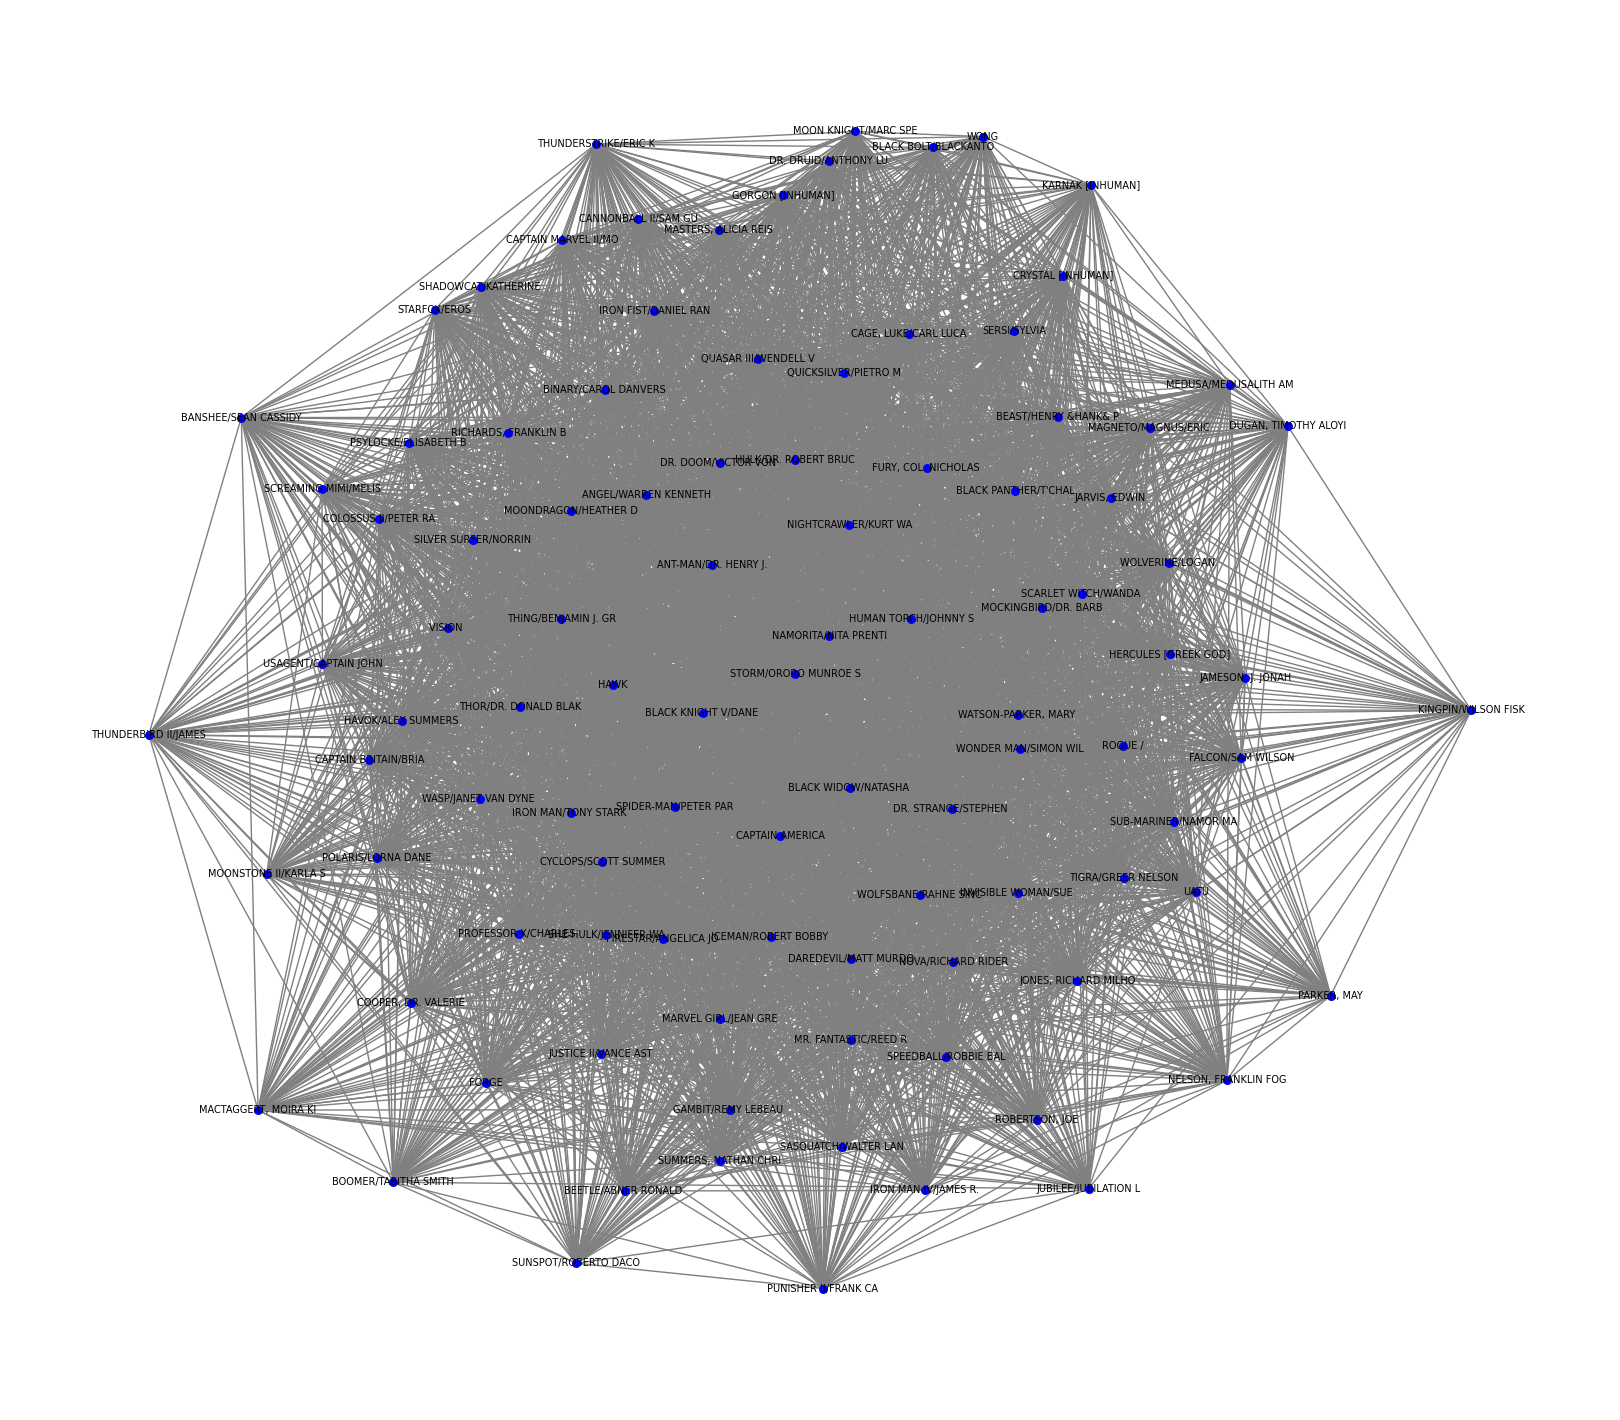

In [35]:
plt.figure(figsize = (16, 14))
nx.draw(heroes, with_labels = True, node_size = 30, node_color = 'blue', edge_color = 'gray', font_size = 7)

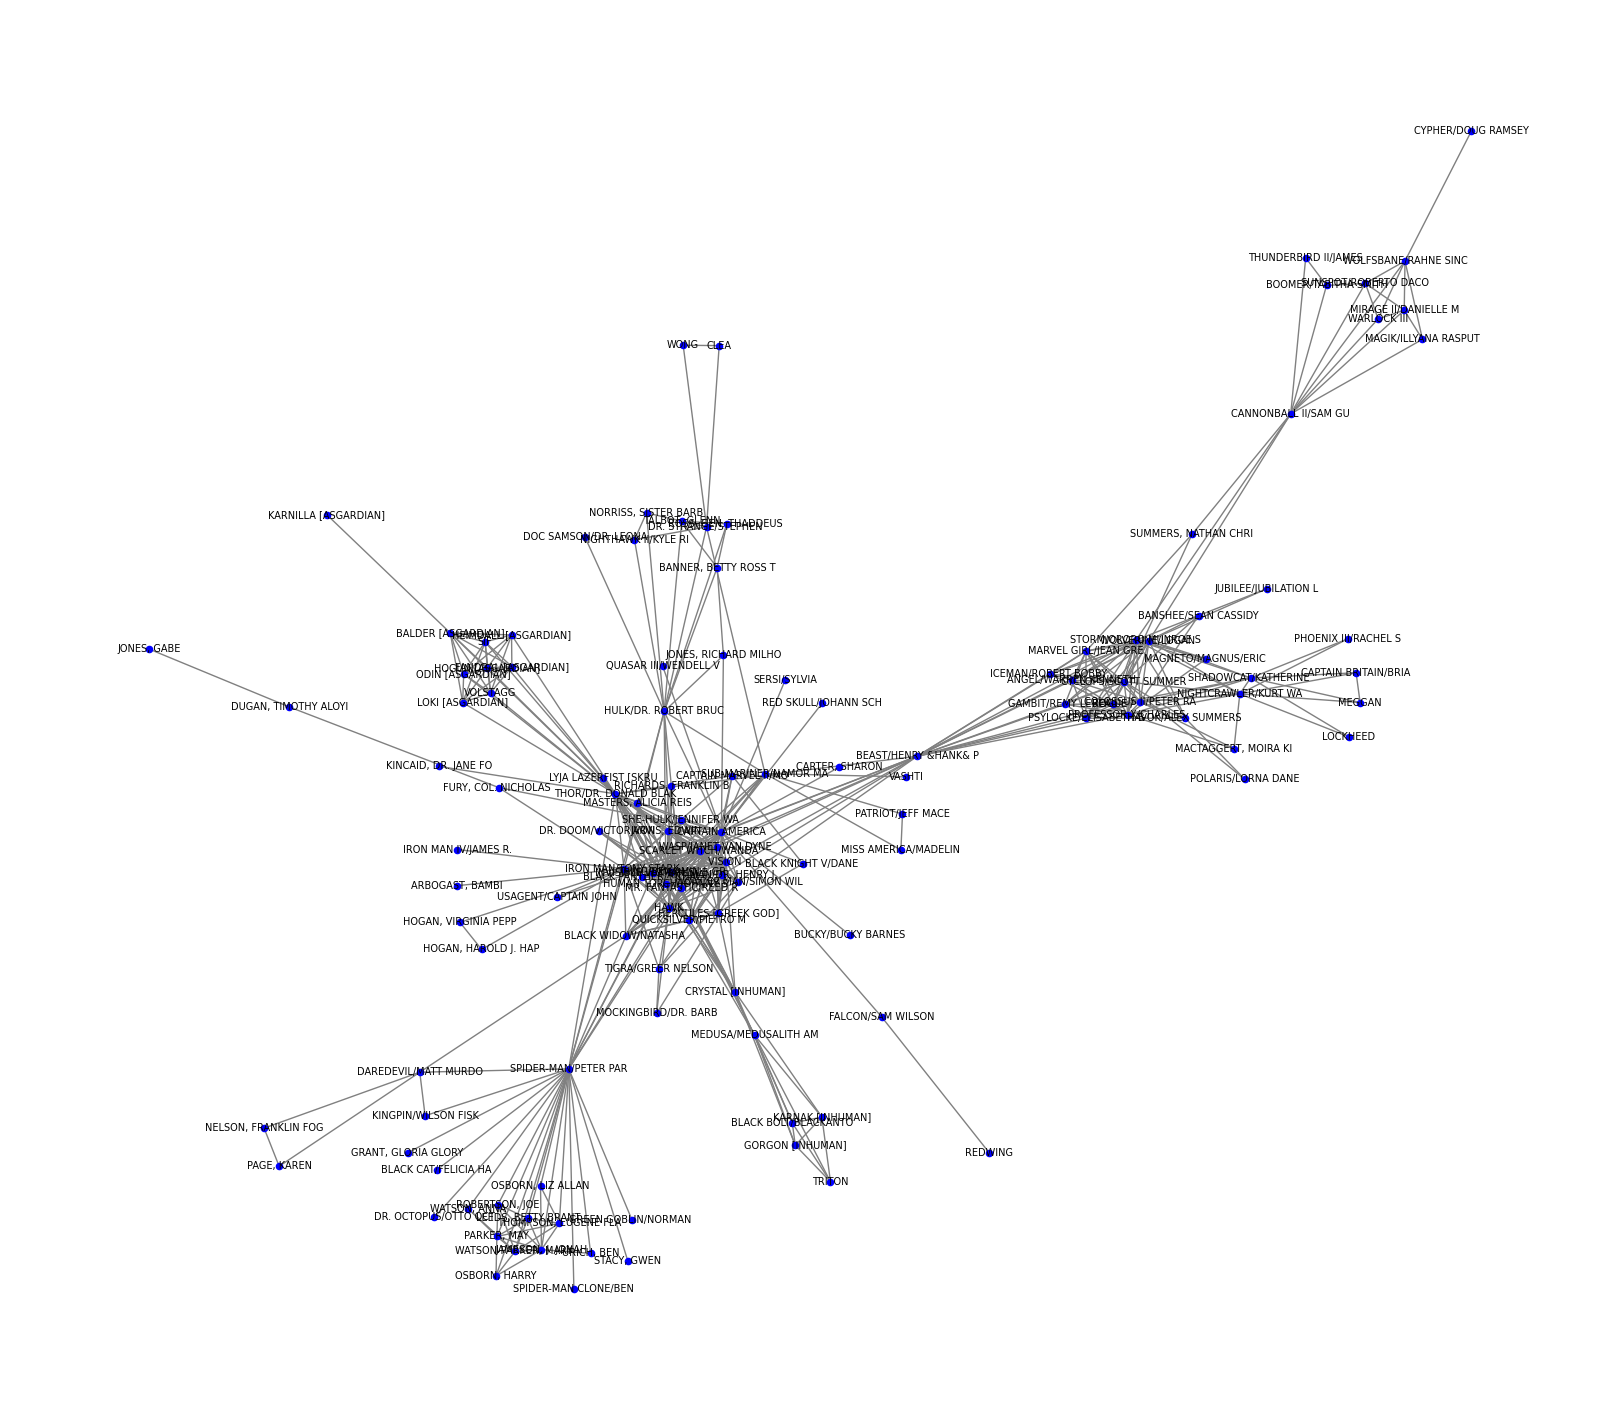

In [2]:
heroes = get_dataset(n_times=80)
fig = plt.figure(figsize=(16, 14))
nx.draw(heroes, with_labels = True, node_size = 20, node_color = 'blue', edge_color = 'gray', font_size = 7)#, pos=nx.spring_layout(heroes))

In [22]:
best_heroes = [x[0] for x in degrees[:1000:10]]
heroes = heroes.subgraph(best_heroes)

In [3]:
print("NODES: ", len(heroes.nodes))
print("EDGES: ", len(heroes.edges))
print("DENSITY: ", nx.density(heroes))
print("RADIUS: ", nx.radius(heroes))
print("DIAMETER: ", nx.diameter(heroes))
print("PERIPHERY: ", nx.periphery(heroes))
print("CLUSTERING: ", nx.average_clustering(heroes))
print("IS CONNECTED: ", nx.is_connected(heroes))

NODES:  128
EDGES:  445
DENSITY:  0.054749015748031496
RADIUS:  4
DIAMETER:  8
PERIPHERY:  ['TRITON', 'CLEA', 'WONG', 'CYPHER/DOUG RAMSEY', 'NELSON, FRANKLIN FOG', 'PAGE, KAREN', 'JONES, GABE']
CLUSTERING:  0.6344385661911207
IS CONNECTED:  True


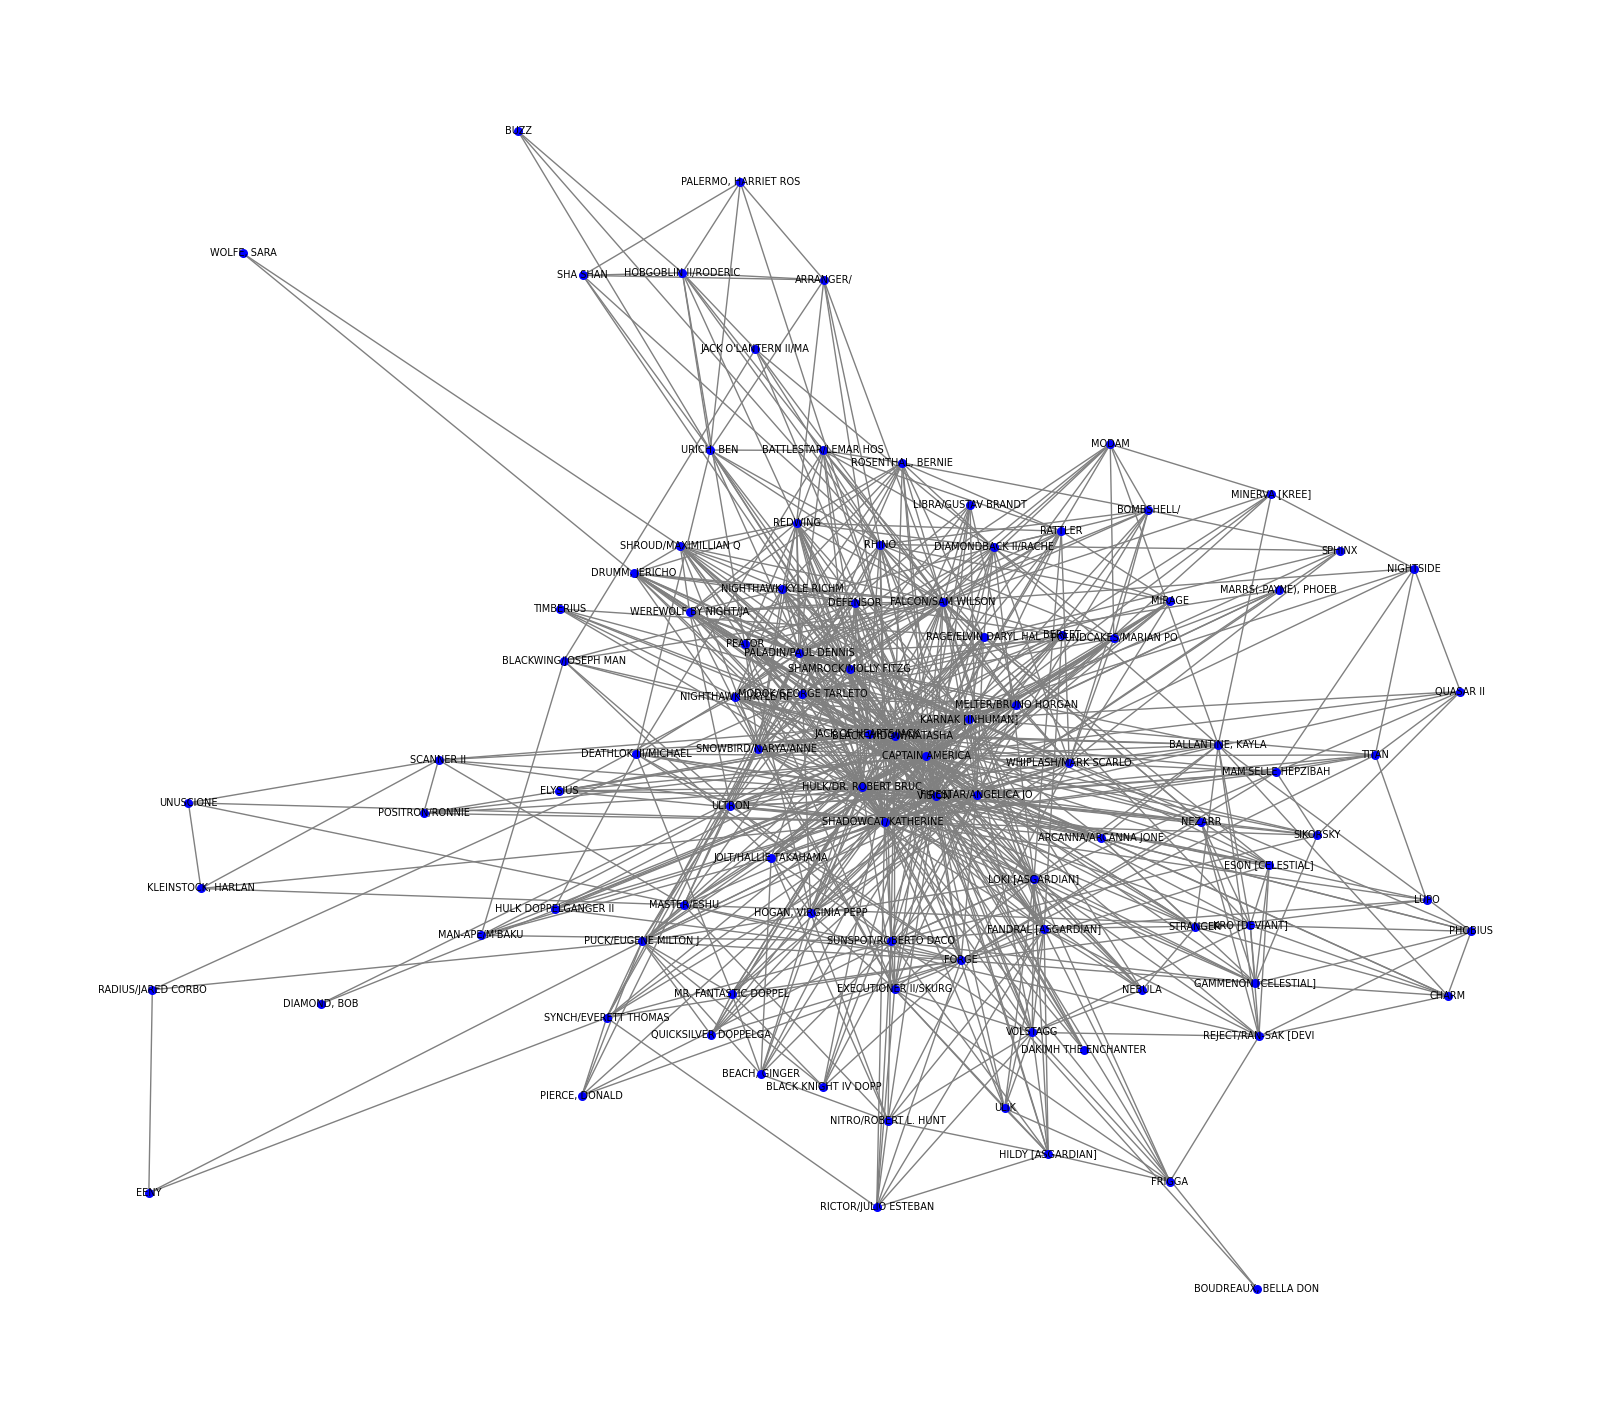

In [24]:
plt.figure(figsize = (16, 14))
nx.draw(heroes, with_labels = True, node_size = 30, node_color = 'blue', edge_color = 'gray', font_size = 7)

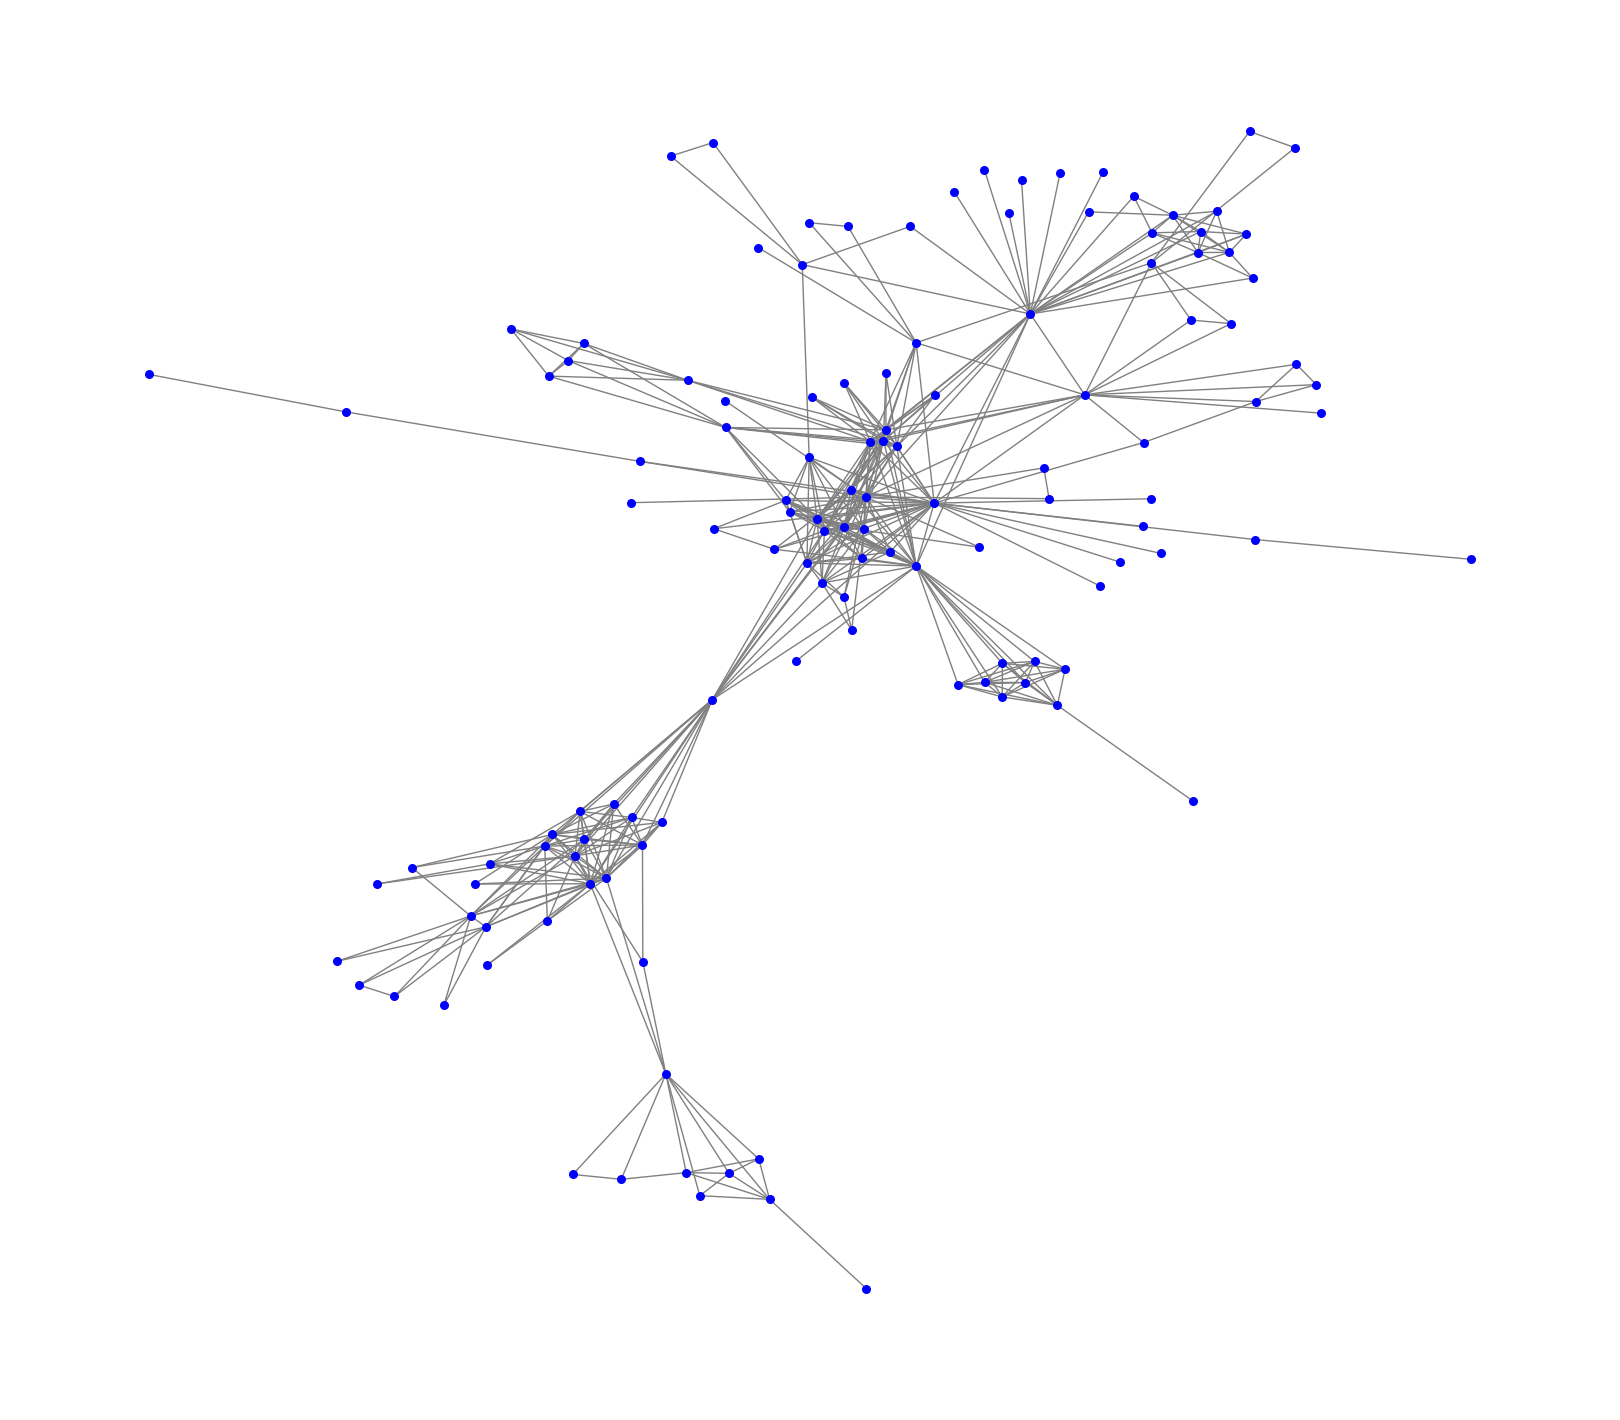

In [6]:
#spring layout
plt.figure(figsize = (16, 14))
spring = nx.spring_layout(heroes)
nx.draw(heroes, spring, with_labels = False, node_size = 30, node_color = 'blue', edge_color = 'gray', font_size = 7)

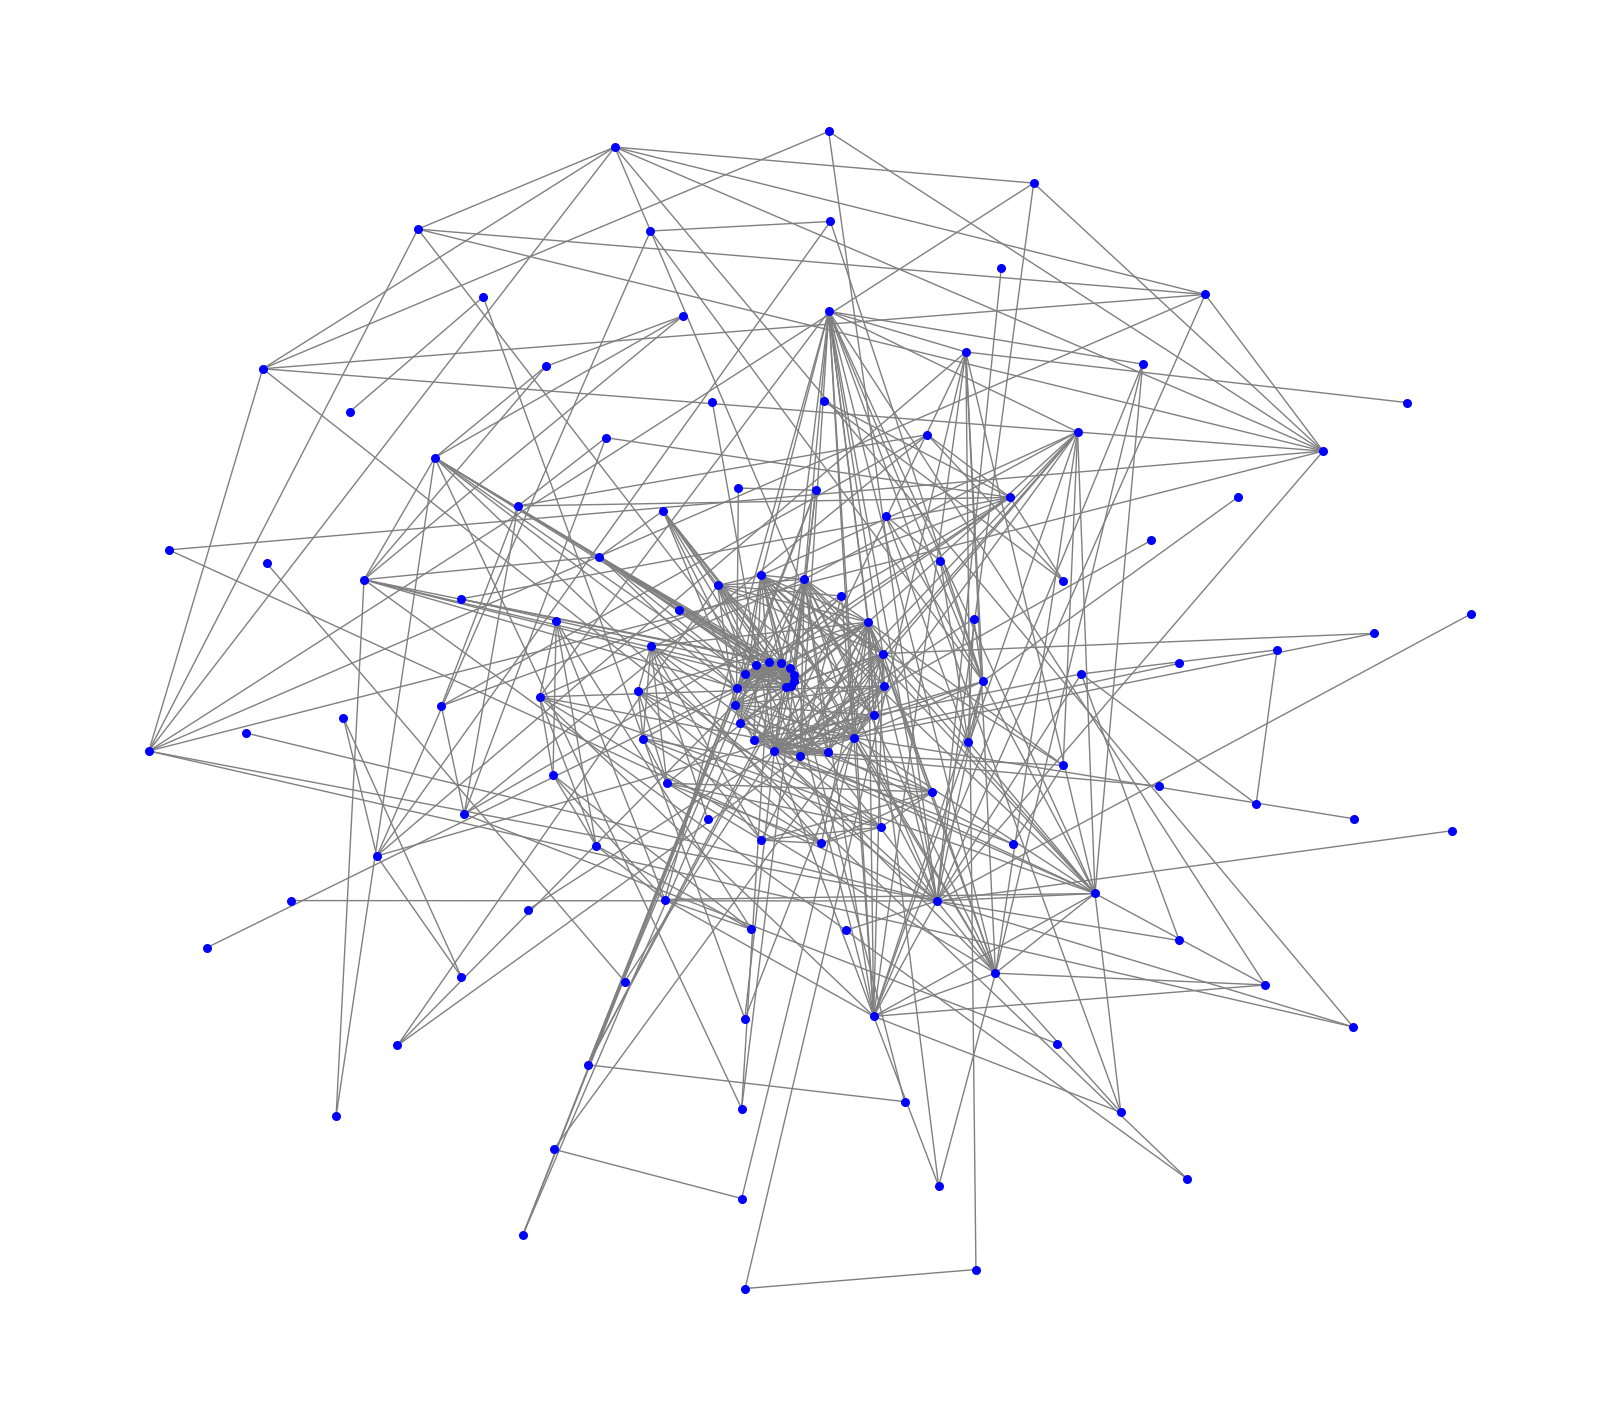

In [7]:
#spiral layout
plt.figure(figsize = (16, 14))
spiral = nx.spiral_layout(heroes)
nx.draw(heroes, spiral, with_labels = False, node_size = 30, node_color = 'blue', edge_color = 'gray', font_size = 7)

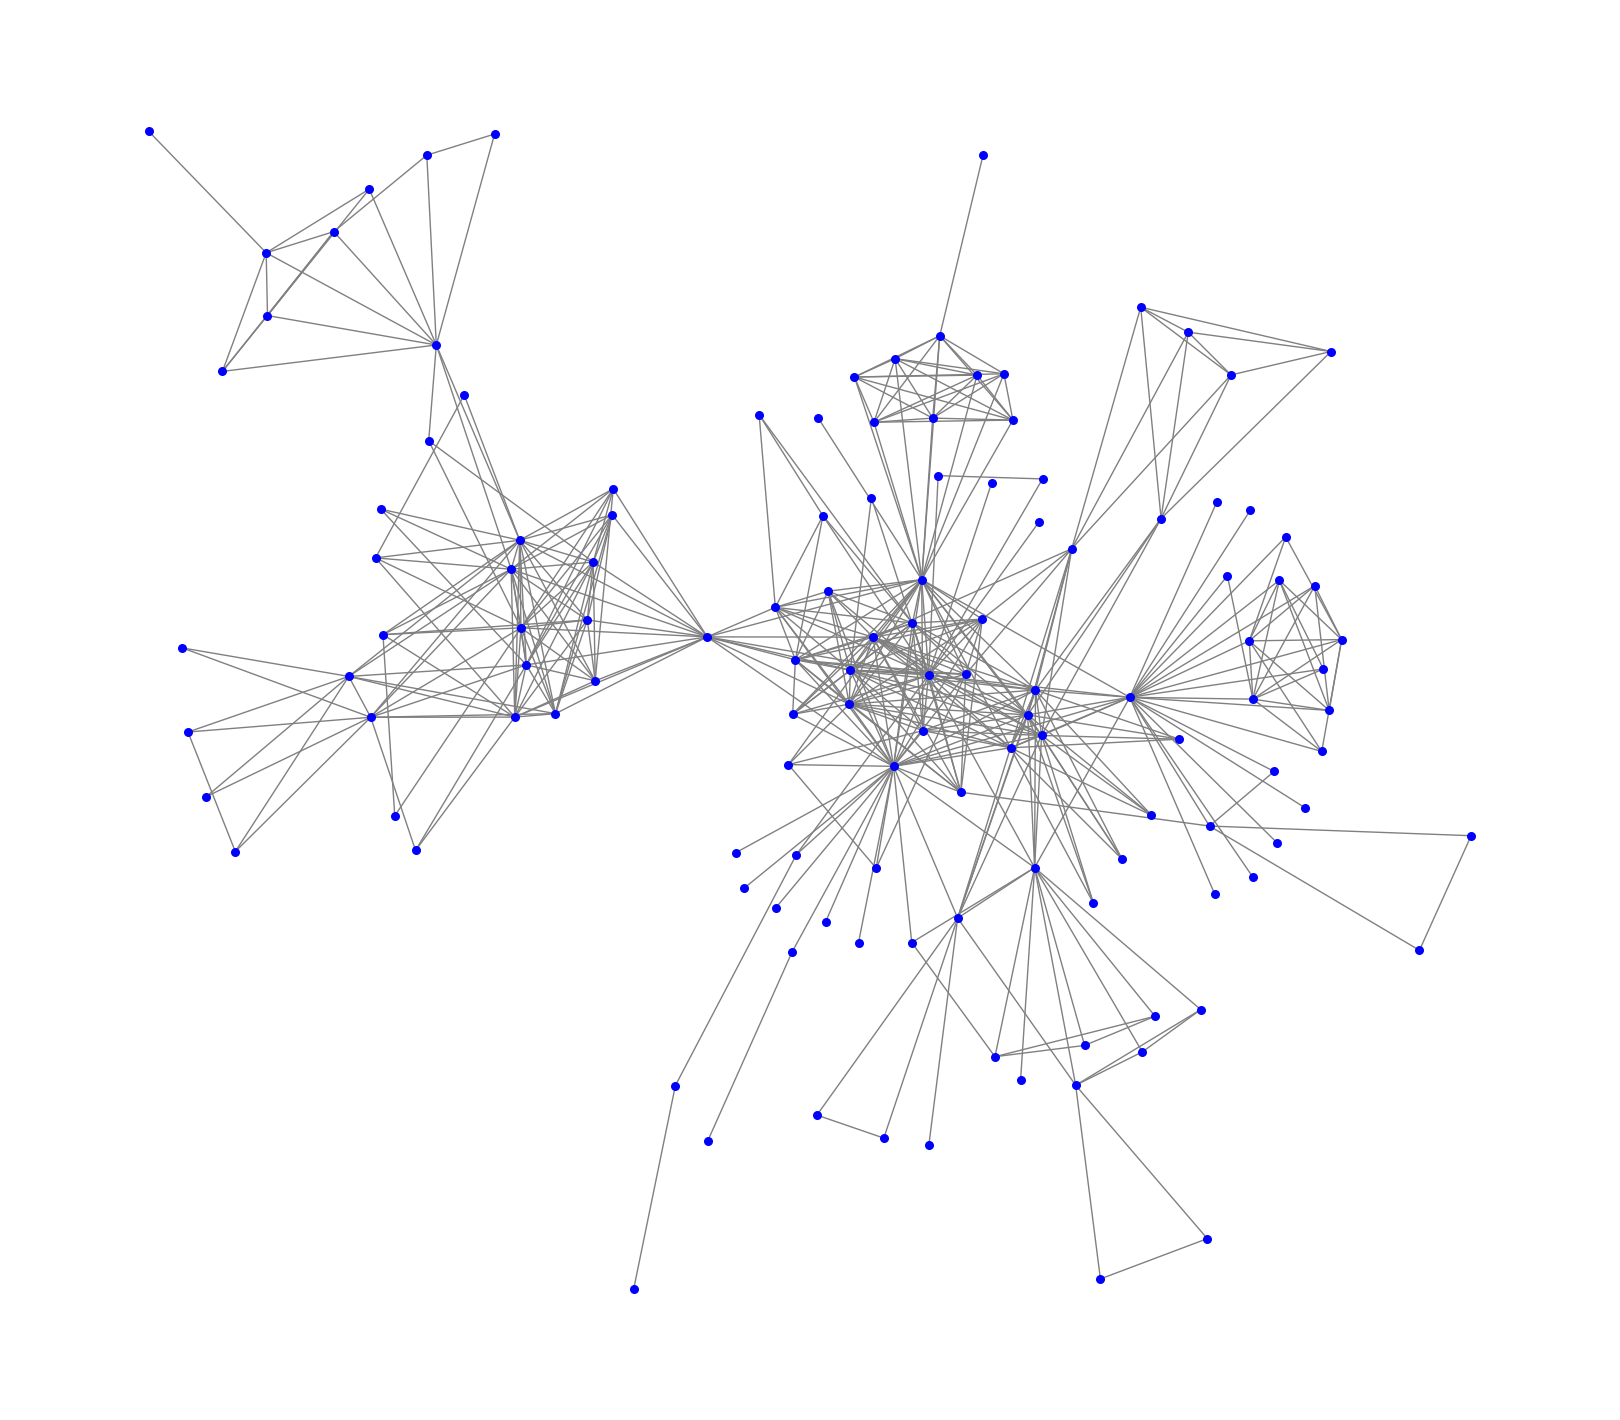

In [9]:
#kamada kawai layout
plt.figure(figsize = (16, 14))
kamada_kawai = nx.kamada_kawai_layout(heroes)
nx.draw(heroes, kamada_kawai, with_labels = False, node_size = 30, node_color = 'blue', edge_color = 'gray', font_size = 7)

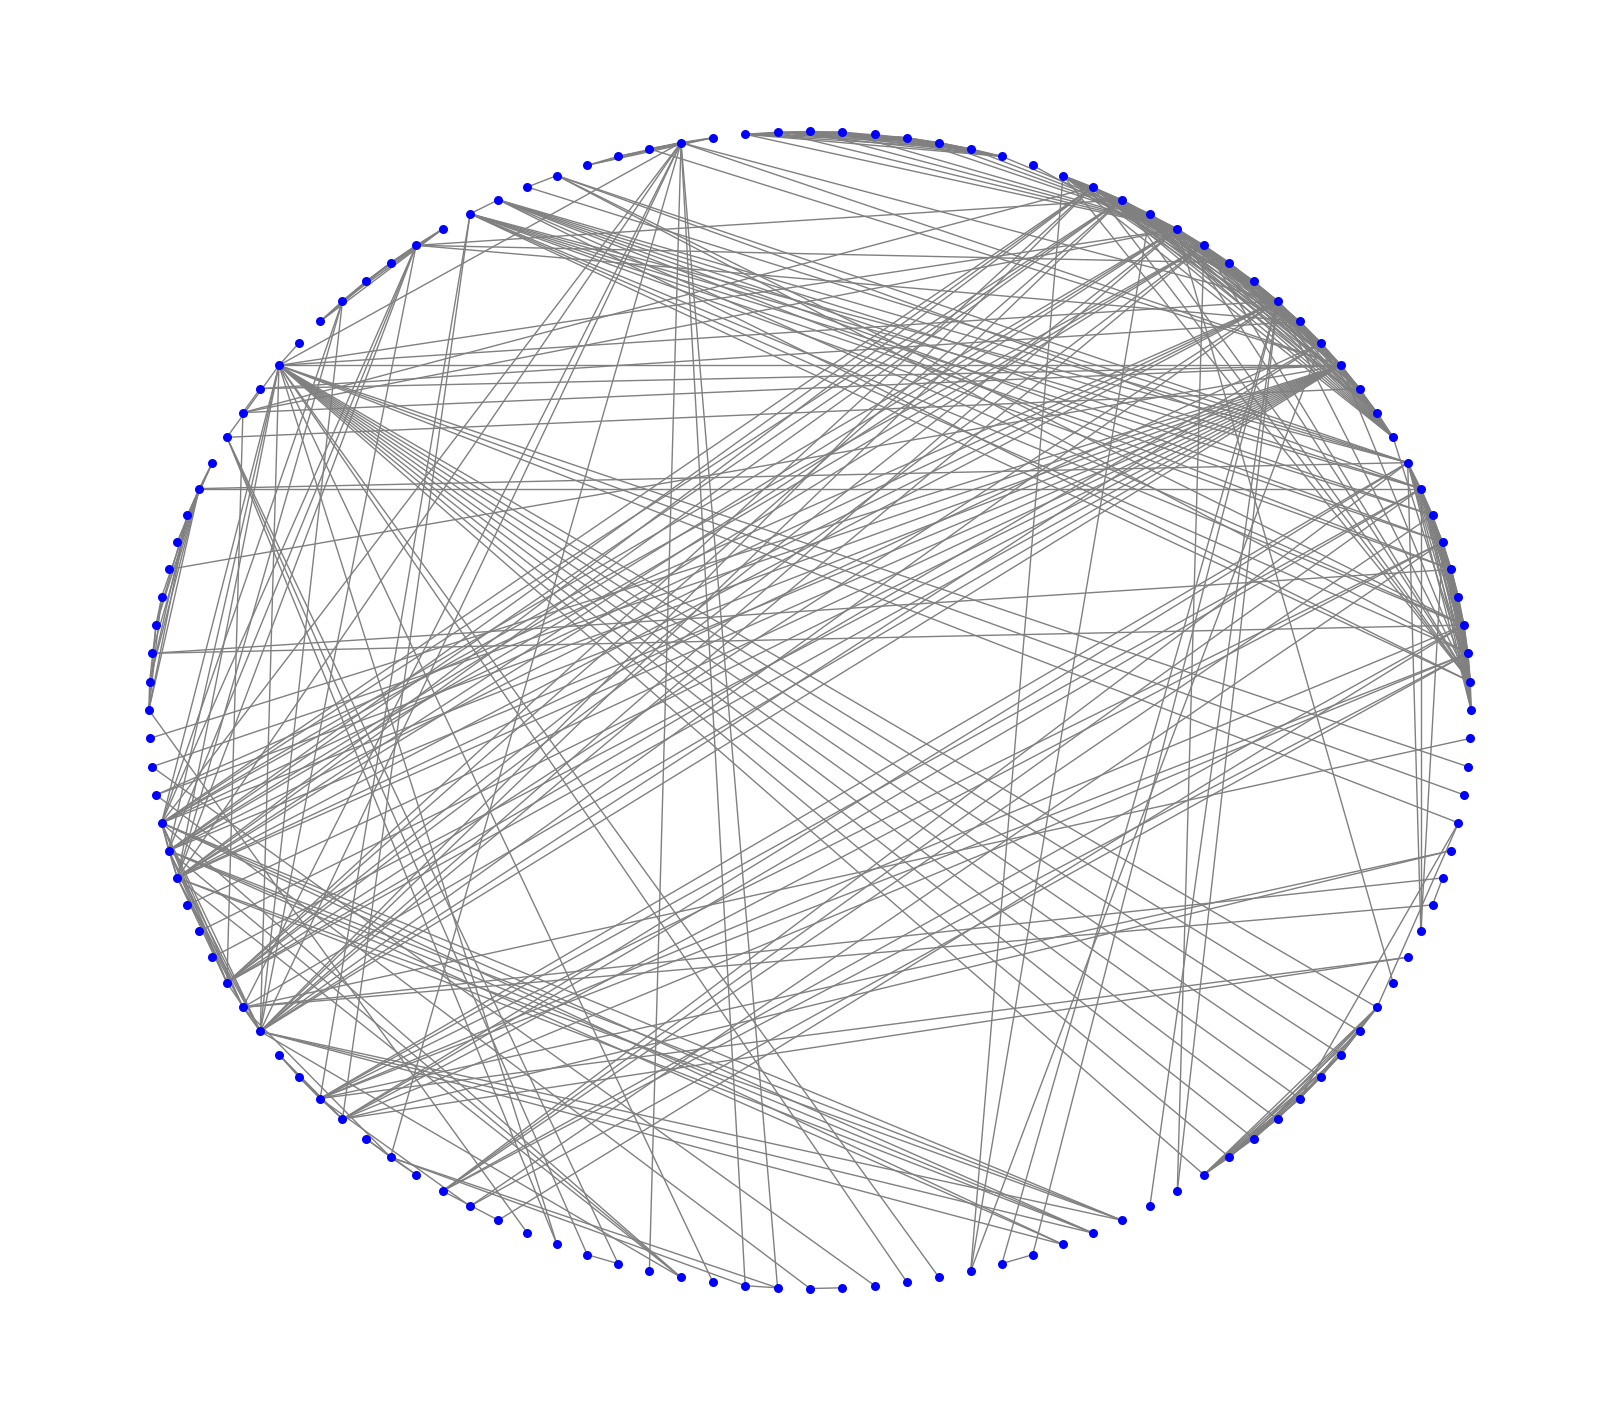

In [22]:
#circular layout
plt.figure(figsize = (16, 14))
circular = nx.circular_layout(heroes)
nx.draw(heroes, circular, with_labels = False, node_size = 30, node_color = 'blue', edge_color = 'gray', font_size = 7)

CAPTAIN AMERICA 0.25
THOR/DR. DONALD BLAK 0.23
IRON MAN/TONY STARK  0.21
SPIDER-MAN/PETER PAR 0.20
SCARLET WITCH/WANDA  0.16
VISION  0.16
WASP/JANET VAN DYNE  0.16
THING/BENJAMIN J. GR 0.16
BEAST/HENRY &HANK& P 0.15


<Figure size 1500x1000 with 0 Axes>

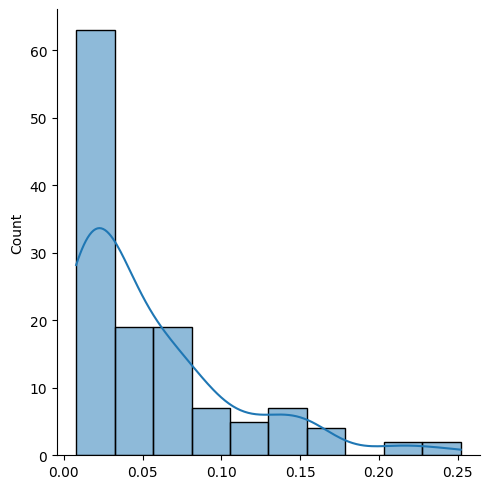

In [3]:
#Degree Centrality
degree = nx.degree_centrality(heroes)
plt.figure(figsize=(15,10))
sns.displot(list(degree.values()), kde=True)

counter = 0
for w in sorted(degree, key = degree.get , reverse = True):
    counter = counter + 1
    if counter == 10:
        break
    print(w,'{:0.2f}'.format(degree[w]))

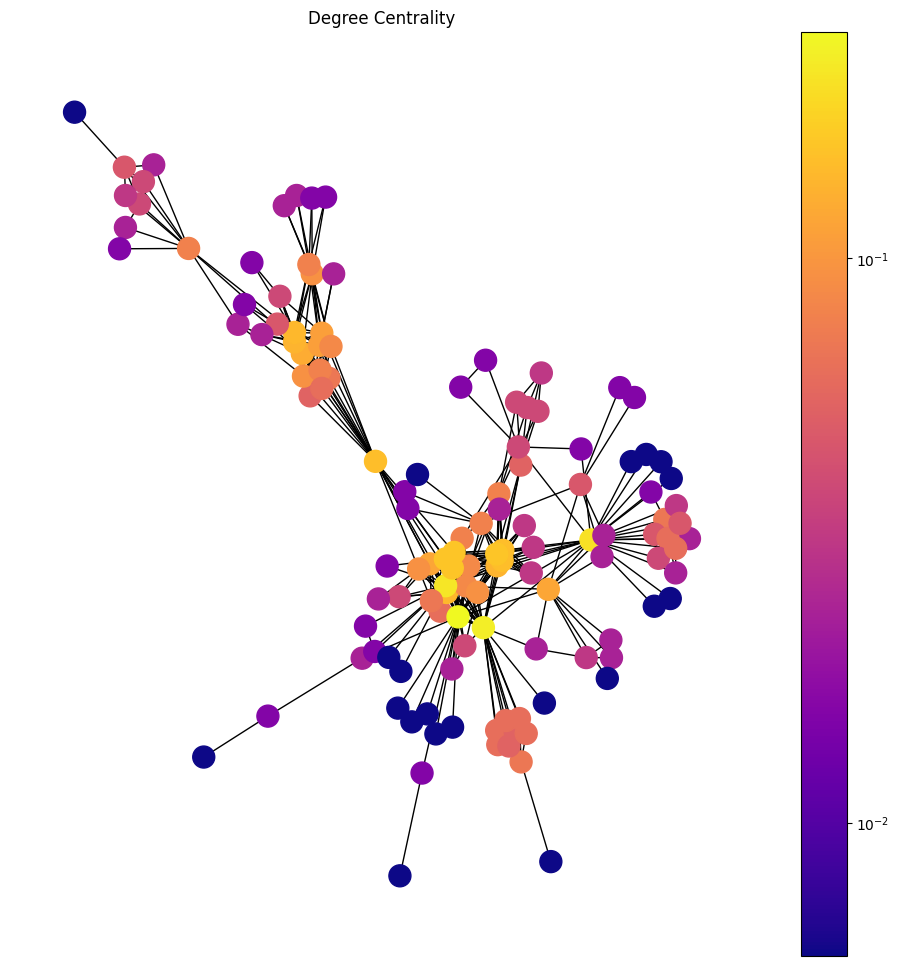

In [10]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(heroes)
draw(heroes, pos, degree, 'Degree Centrality')

CAPTAIN AMERICA 0.48
IRON MAN/TONY STARK  0.46
THOR/DR. DONALD BLAK 0.45
BEAST/HENRY &HANK& P 0.42
VISION  0.41
SCARLET WITCH/WANDA  0.41
WASP/JANET VAN DYNE  0.41
SPIDER-MAN/PETER PAR 0.41
THING/BENJAMIN J. GR 0.41


<Figure size 1500x1000 with 0 Axes>

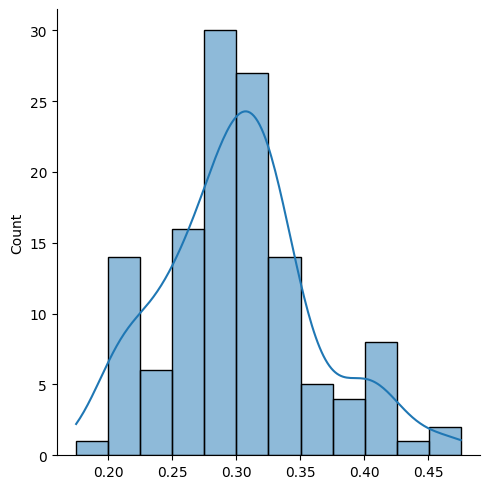

In [11]:
#Closeness Centrality
closeness = nx.closeness_centrality(heroes)
plt.figure(figsize=(15,10))
sns.displot(list(closeness.values()), kde=True)

counter = 0
for w in sorted(closeness, key = closeness.get , reverse = True):
    counter = counter + 1
    if counter == 10:
        break
    print(w,'{:0.2f}'.format(closeness[w]))

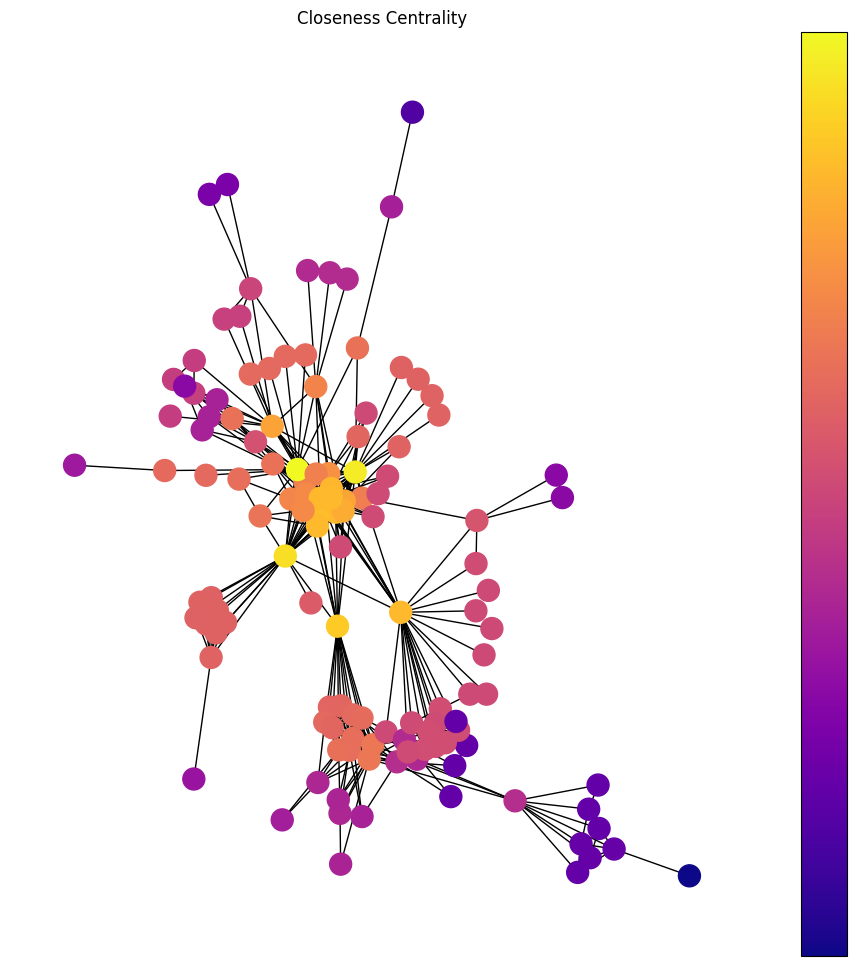

In [12]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(heroes)
draw(heroes, pos, closeness, 'Closeness Centrality')

BEAST/HENRY &HANK& P 0.39
SPIDER-MAN/PETER PAR 0.27
CAPTAIN AMERICA 0.27
THOR/DR. DONALD BLAK 0.20
IRON MAN/TONY STARK  0.17
HULK/DR. ROBERT BRUC 0.12
CANNONBALL II/SAM GU 0.12
WOLVERINE/LOGAN  0.10
STORM/ORORO MUNROE S 0.09


<Figure size 1500x1000 with 0 Axes>

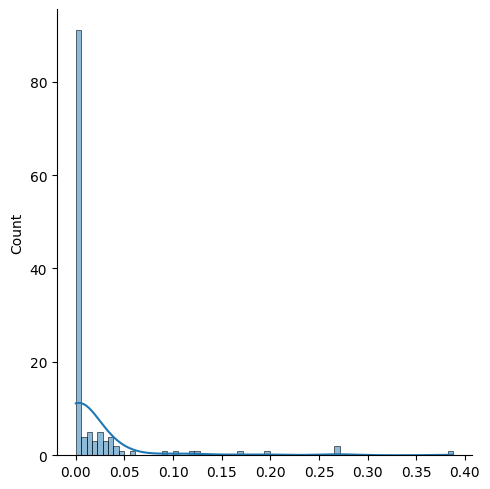

In [14]:
#Betweenness Centrality
betweenness = nx.betweenness_centrality(heroes)
plt.figure(figsize=(15,10))
sns.displot(list(betweenness.values()), kde=True)

counter = 0
for w in sorted(betweenness, key = betweenness.get , reverse = True):
    counter = counter + 1
    if counter == 10:
        break
    print(w,'{:0.2f}'.format(betweenness[w]))

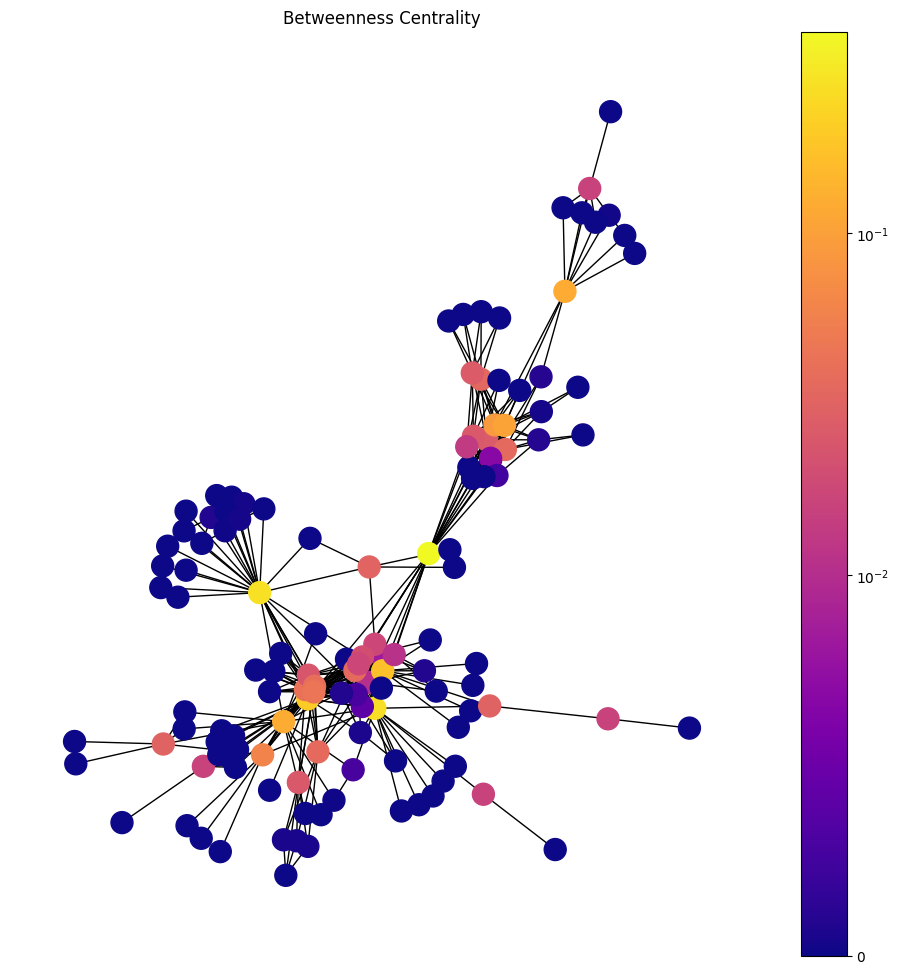

In [16]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(heroes)
draw(heroes, pos, betweenness, 'Betweenness Centrality')

CAPTAIN AMERICA 0.29
THOR/DR. DONALD BLAK 0.28
IRON MAN/TONY STARK  0.28
VISION  0.26
WASP/JANET VAN DYNE  0.26
SCARLET WITCH/WANDA  0.26
HAWK 0.23
THING/BENJAMIN J. GR 0.22
MR. FANTASTIC/REED R 0.22


<Figure size 1500x1000 with 0 Axes>

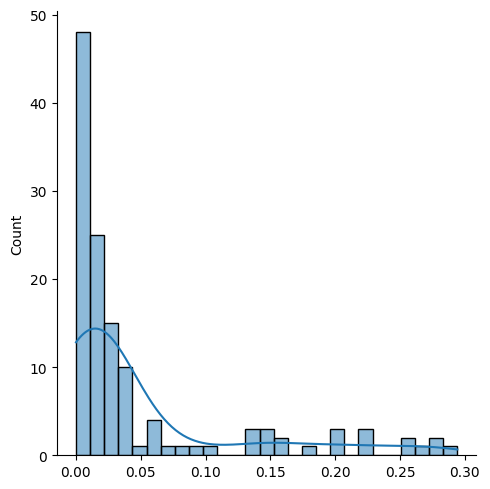

In [17]:
#Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(heroes)
plt.figure(figsize=(15,10))
sns.displot(list(eigenvector.values()), kde=True)

counter = 0
for w in sorted(eigenvector, key = eigenvector.get , reverse = True):
    counter = counter + 1
    if counter == 10:
        break
    print(w,'{:0.2f}'.format(eigenvector[w]))

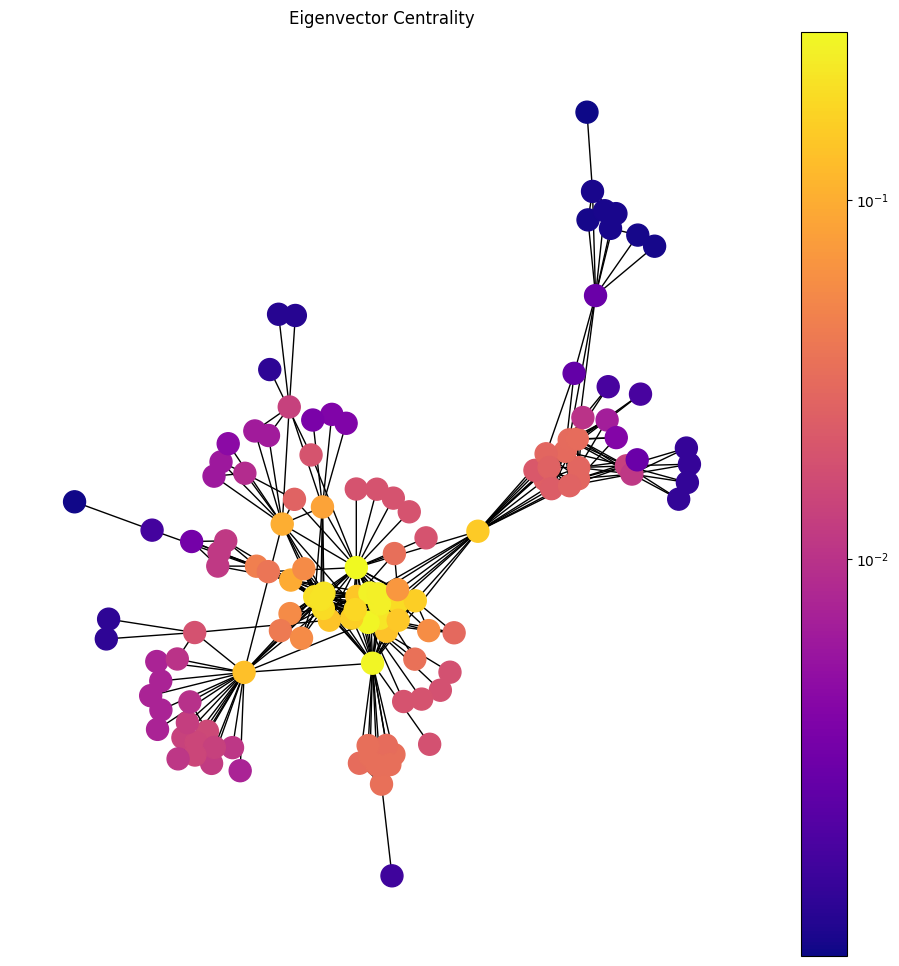

In [18]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(heroes)
draw(heroes, pos, eigenvector, 'Eigenvector Centrality')